In [ ]:
import pandas as pd
import numpy as np
import itertools

from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_decision_regions

import sklearn
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [ ]:
train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/titanic_train.csv")
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/titanic_test.csv")

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [ ]:
train_data.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
train_data["Sex"] = train_data["Sex"].map({"male":1, "female":0})
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,NaN,1,2,23.4500,NaN,S
889,1,1,1,26.0,0,0,30.0000,C148,C


In [ ]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
train_data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
train_data["Embarked"].mode()

0    S
dtype: object

In [ ]:
train_data["Embarked"].fillna('S', inplace=True)

In [ ]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

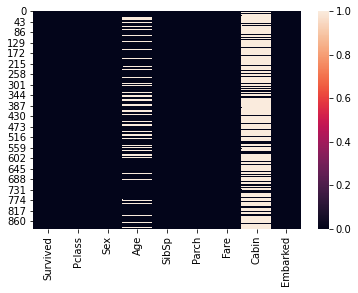

In [ ]:
sns.heatmap(train_data.isnull())

In [ ]:
md = train_data["Age"].median()
mo = train_data["Age"].mode()
max = train_data["Age"].max()

a = int((max-mo)/2)
b = int((max+mo)/2)
print(a,b)

28 52


In [ ]:
import random
ls = []
for i in range(177):
  ls.append(random.randint(a,b))

ls

[51,
 32,
 51,
 49,
 46,
 42,
 32,
 46,
 50,
 40,
 37,
 30,
 50,
 38,
 37,
 32,
 50,
 43,
 30,
 38,
 30,
 37,
 50,
 50,
 48,
 38,
 43,
 33,
 46,
 46,
 51,
 28,
 39,
 38,
 41,
 28,
 32,
 50,
 28,
 44,
 41,
 33,
 36,
 47,
 52,
 51,
 42,
 44,
 34,
 52,
 31,
 43,
 29,
 47,
 42,
 39,
 42,
 49,
 46,
 41,
 39,
 29,
 44,
 52,
 45,
 29,
 36,
 51,
 34,
 47,
 36,
 52,
 48,
 48,
 44,
 49,
 31,
 35,
 50,
 35,
 37,
 33,
 34,
 48,
 34,
 51,
 32,
 40,
 43,
 38,
 40,
 48,
 46,
 34,
 47,
 34,
 52,
 50,
 29,
 43,
 36,
 50,
 49,
 49,
 41,
 34,
 43,
 30,
 32,
 51,
 30,
 44,
 41,
 39,
 52,
 51,
 30,
 51,
 48,
 42,
 33,
 33,
 51,
 37,
 39,
 45,
 50,
 43,
 31,
 30,
 39,
 39,
 40,
 47,
 44,
 47,
 39,
 33,
 46,
 28,
 36,
 34,
 45,
 47,
 52,
 50,
 40,
 36,
 50,
 43,
 52,
 49,
 44,
 32,
 47,
 39,
 32,
 48,
 52,
 47,
 40,
 38,
 32,
 50,
 31,
 34,
 32,
 41,
 34,
 31,
 33,
 45,
 47,
 45,
 45,
 36,
 32]

In [ ]:
train_data.loc[np.isnan(train_data['Age']), 'Age'] = ls
train_data['Age'] = train_data['Age'].astype(int)

In [ ]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [ ]:
train_data["Has_Cabin"] = train_data["Cabin"].apply(lambda x: 0 if type(x)==float else 1)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Has_Cabin
0,0,3,1,22,1,0,7.2500,NaN,S,0
1,1,1,0,38,1,0,71.2833,C85,C,1
2,1,3,0,26,0,0,7.9250,NaN,S,0
3,1,1,0,35,1,0,53.1000,C123,S,1
4,0,3,1,35,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,NaN,S,0
887,1,1,0,19,0,0,30.0000,B42,S,1
888,0,3,0,32,1,2,23.4500,NaN,S,0
889,1,1,1,26,0,0,30.0000,C148,C,1


In [ ]:
train_data.drop(["Cabin"], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    int64  
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   Has_Cabin  891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


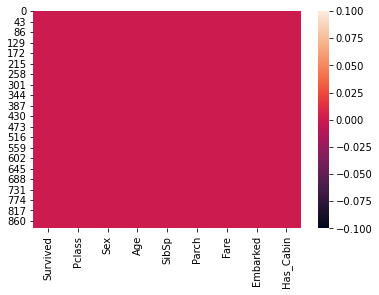

In [ ]:
train_data.info()
sns.heatmap(train_data.isnull())

In [ ]:
embarks = pd.get_dummies(train_data["Embarked"], prefix="Embarked", drop_first=True)

In [ ]:
data = pd.concat([train_data, embarks], axis=1)

data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7.2500,S,0,0,1
1,1,1,0,38,1,0,71.2833,C,1,0,0
2,1,3,0,26,0,0,7.9250,S,0,0,1
3,1,1,0,35,1,0,53.1000,S,1,0,1
4,0,3,1,35,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,S,0,0,1
887,1,1,0,19,0,0,30.0000,S,1,0,1
888,0,3,0,32,1,2,23.4500,S,0,0,1
889,1,1,1,26,0,0,30.0000,C,1,0,0


In [ ]:
data.drop(["Embarked"], axis=1, inplace=True)

In [ ]:
x = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=57)

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
clf1 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)
clf2 = KNeighborsClassifier(n_neighbors=1)
clf3 = SVC()
lr = LogisticRegression()

In [ ]:
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)

In [ ]:
pca = PCA(n_components=2)

x_pca = pca.fit_transform(x)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

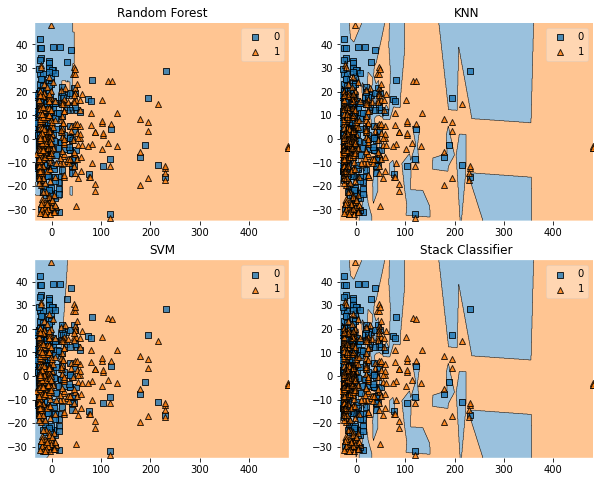

In [ ]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

for clf, label, grd in zip([clf1, clf2, clf3, sclf], ['Random Forest', 'KNN', 'SVM', 'Stack Classifier'], itertools.product([0,1], repeat=2)):
  clf.fit(x_pca, y)
  ax = plt.subplot(gs[grd[0], grd[1]])
  fig = plot_decision_regions(X=x_pca, y=y, clf=clf)
  plt.title(label)  

In [ ]:
for clf, label in zip([clf1, clf2, clf3, sclf], ['Random Forest', 'KNN', 'SVM', 'Stack Classifier']):
  scores = model_selection.cross_val_score(clf, x, y, cv=3, scoring='accuracy')
  print(f"score : {scores.mean()}\t clf : {label}")  

score : 0.8092031425364757	 clf : Random Forest
score : 0.6756453423120089	 clf : KNN
score : 0.6565656565656566	 clf : SVM
score : 0.6756453423120089	 clf : Stack Classifier
